In [20]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [22]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [23]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [24]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [49]:
city_data = []

In [50]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [51]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c7e7afe8986a3206717a9398266788e4


In [52]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [53]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | barrow
Processing Record 2 of Set 13 | greenwood
Processing Record 3 of Set 13 | jamestown
Processing Record 4 of Set 13 | kaitangata
Processing Record 5 of Set 13 | mahebourg
Processing Record 6 of Set 13 | qaanaaq
Processing Record 7 of Set 13 | new norfolk
Processing Record 8 of Set 13 | plauen
Processing Record 9 of Set 13 | hilo
Processing Record 10 of Set 13 | hobart
Processing Record 11 of Set 13 | karakol
Processing Record 12 of Set 13 | vaini
Processing Record 13 of Set 13 | atuona
Processing Record 14 of Set 13 | arraial do cabo
Processing Record 15 of Set 13 | geraldton
Processing Record 16 of Set 13 | khatanga
Processing Record 17 of Set 13 | chuy
Processing Record 18 of Set 13 | tucuman
Processing Record 19 of Set 13 | changji
Processing Record 20 of Set 13 | bambous virieux
Processing Record 21 of Set 13 | puerto ayora
Processing Record 22 of Set 13 | ushuaia
Processing Record 23 o

Processing Record 36 of Set 16 | narwar
Processing Record 37 of Set 16 | dubbo
Processing Record 38 of Set 16 | muros
Processing Record 39 of Set 16 | bitung
Processing Record 40 of Set 16 | takoradi
Processing Record 41 of Set 16 | warqla
City not found. Skipping...
Processing Record 42 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 16 | shingu
Processing Record 44 of Set 16 | lavrentiya
Processing Record 45 of Set 16 | ponta do sol
Processing Record 46 of Set 16 | salalah
Processing Record 47 of Set 16 | iqaluit
Processing Record 48 of Set 16 | villazon
Processing Record 49 of Set 16 | sao joao da barra
Processing Record 50 of Set 16 | barentsburg
City not found. Skipping...
Processing Record 1 of Set 17 | mirabad
Processing Record 2 of Set 17 | quimper
Processing Record 3 of Set 17 | avera
Processing Record 4 of Set 17 | acapulco
Processing Record 5 of Set 17 | high prairie
Processing Record 6 of Set 17 | doka
Processing Record 7 of Set 17 | komsomo

Processing Record 14 of Set 20 | ahipara
Processing Record 15 of Set 20 | grindavik
Processing Record 16 of Set 20 | salinopolis
Processing Record 17 of Set 20 | messina
Processing Record 18 of Set 20 | zlatoust
Processing Record 19 of Set 20 | anadyr
Processing Record 20 of Set 20 | jhanjharpur
Processing Record 21 of Set 20 | danshui
Processing Record 22 of Set 20 | faanui
Processing Record 23 of Set 20 | narsaq
Processing Record 24 of Set 20 | san cristobal
Processing Record 25 of Set 20 | freeport
Processing Record 26 of Set 20 | san felipe
Processing Record 27 of Set 20 | beloha
Processing Record 28 of Set 20 | aljezur
Processing Record 29 of Set 20 | faya
Processing Record 30 of Set 20 | sao miguel do araguaia
Processing Record 31 of Set 20 | omaruru
Processing Record 32 of Set 20 | itoman
Processing Record 33 of Set 20 | henties bay
Processing Record 34 of Set 20 | manokwari
Processing Record 35 of Set 20 | acarau
Processing Record 36 of Set 20 | leh
Processing Record 37 of Set 

Processing Record 46 of Set 23 | kaduqli
Processing Record 47 of Set 23 | casa nova
Processing Record 48 of Set 23 | tyukhtet
Processing Record 49 of Set 23 | sainte-anne-des-monts
Processing Record 50 of Set 23 | buala
Processing Record 1 of Set 24 | mokhsogollokh
Processing Record 2 of Set 24 | pokrovsk
Processing Record 3 of Set 24 | dorado
Processing Record 4 of Set 24 | seara
Processing Record 5 of Set 24 | yunjinghong
City not found. Skipping...
Processing Record 6 of Set 24 | cao bang
Processing Record 7 of Set 24 | grand bank
Processing Record 8 of Set 24 | wuwei
Processing Record 9 of Set 24 | santa vitoria
Processing Record 10 of Set 24 | odweyne
Processing Record 11 of Set 24 | colchester
Processing Record 12 of Set 24 | kankaanpaa
Processing Record 13 of Set 24 | hirara
Processing Record 14 of Set 24 | meligalas
Processing Record 15 of Set 24 | tucurui
Processing Record 16 of Set 24 | eskasem
City not found. Skipping...
Processing Record 17 of Set 24 | moa
Processing Record

In [54]:
len(city_data)

545

In [55]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-18.40,69,75,10.36,US,2021-01-31 23:43:17
1,Greenwood,34.1668,-82.1165,41.00,100,90,6.91,US,2021-01-31 23:43:17
2,Jamestown,42.0970,-79.2353,28.99,74,90,13.80,US,2021-01-31 23:43:18
3,Kaitangata,-46.2817,169.8464,68.00,63,87,5.99,NZ,2021-01-31 23:43:18
4,Mahebourg,-20.4081,57.7000,80.60,78,75,13.80,MU,2021-01-31 23:43:18
5,Qaanaaq,77.4840,-69.3632,-3.71,88,100,2.55,GL,2021-01-31 23:43:18
6,New Norfolk,-42.7826,147.0587,75.00,47,52,1.99,AU,2021-01-31 23:43:18
7,Plauen,50.5000,12.1333,23.00,84,89,1.99,DE,2021-01-31 23:43:18
8,Hilo,19.7297,-155.0900,78.80,61,40,3.44,US,2021-01-31 23:43:18
9,Hobart,-42.8794,147.3294,75.00,56,75,11.50,AU,2021-01-31 23:43:18


In [56]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-01-31 23:43:17,71.2906,-156.7887,-18.40,69,75,10.36
1,Greenwood,US,2021-01-31 23:43:17,34.1668,-82.1165,41.00,100,90,6.91
2,Jamestown,US,2021-01-31 23:43:18,42.0970,-79.2353,28.99,74,90,13.80
3,Kaitangata,NZ,2021-01-31 23:43:18,-46.2817,169.8464,68.00,63,87,5.99
4,Mahebourg,MU,2021-01-31 23:43:18,-20.4081,57.7000,80.60,78,75,13.80
5,Qaanaaq,GL,2021-01-31 23:43:18,77.4840,-69.3632,-3.71,88,100,2.55
6,New Norfolk,AU,2021-01-31 23:43:18,-42.7826,147.0587,75.00,47,52,1.99
7,Plauen,DE,2021-01-31 23:43:18,50.5000,12.1333,23.00,84,89,1.99
8,Hilo,US,2021-01-31 23:43:18,19.7297,-155.0900,78.80,61,40,3.44
9,Hobart,AU,2021-01-31 23:43:18,-42.8794,147.3294,75.00,56,75,11.50


In [58]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [59]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

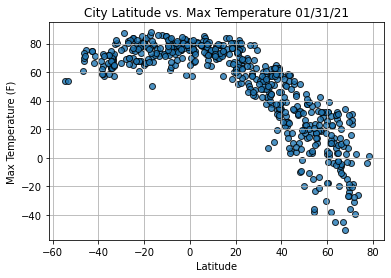

In [63]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

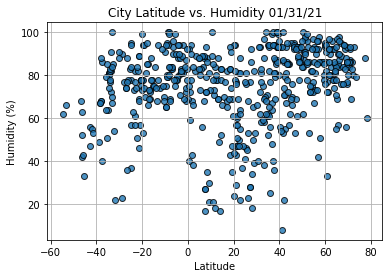

In [64]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

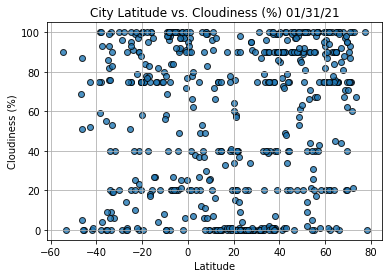

In [65]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

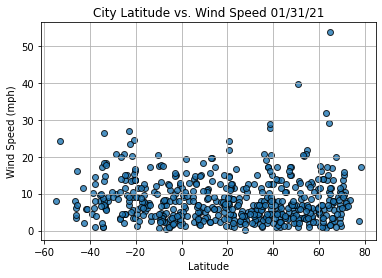

In [66]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()